<a href="https://colab.research.google.com/github/aratatokyo/GraSPP-25S-climatechange/blob/MO-Zuanbin/EffectiveClimatePolicy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Effective Climate Policies

Datasource: https://climate-policy-explorer.shinyapps.io/climate-policies-dashboard/download/
*斜体テキスト*
Using the Science paper’s supplementary appendix, I compiled the set of climate policies found to be effective in the study and organized them according to their respective sectors.

# 1. Import Data

In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/policies_download.csv')
df.head(5)

,Sector,Policy_subcategory,Year,Policy_name,Instrument,Country,Break_id
0,Buildings,Financing Mechanism Buildings,2018,Financing mechanism,Subsidy,Australia,AUS_2019_Buildings
1,Buildings,Bans and Phaseouts Fossil Fuels Heating,2019,Ban & phase out,Regulation,Denmark,DNK_2020_Buildings
2,Buildings,Financing Mechanism Buildings,2011,Financing mechanism,Subsidy,Greece,GRC_2012_Buildings
3,Buildings,Fossil Fuel Subsides Buildings,2012,Fossil fuel subsidy reform,Pricing,Greece,GRC_2012_Buildings
4,Buildings,BuildingEnergyCodes,2013,Building code,Regulation,Greece,GRC_2012_Buildings


# 2. Statistical Description on Climate Policies

In [2]:
sector_counts = (
    df['Sector']
    .value_counts()
    .rename_axis('Sector')
    .reset_index(name='Count')
)

policy_counts = (
    df['Policy_name']
    .value_counts()
    .rename_axis('Policy_name')
    .reset_index(name='Count')
)

instrument_counts = (
    df['Instrument']
    .value_counts()
    .rename_axis('Instrument')
    .reset_index(name='Count')
)

print("=== Sector Implementation Counts ===")
print(sector_counts.to_string(index=False))

print("=== Policy_name Implementation Counts ===")
print(policy_counts.to_string(index=False))

print("\n=== Instrument Implementation Counts ===")
print(instrument_counts.to_string(index=False))

=== Sector Implementation Counts ===
     Sector  Count
  Buildings     54
  Transport     53
Electricity     37
   Industry     32
=== Policy_name Implementation Counts ===
                 Policy_name  Count
                    Taxation     18
         Financing mechanism     16
            Adoption subsidy     16
                     EU-MEPS     15
             Ban & phase out     14
        Performance standard     13
          Taxation (driving)     13
           Renewable subsidy      8
 Public expenditure for rail      8
  Fossil fuel subsidy reform      7
                   EU-Labels      7
               Building code      6
Renewable portfolio standard      6
          Taxation (vehicle)      6
                      EU-ETS      6
          Renewable planning      5
                       Label      5
   Energy efficiency mandate      4
                      Label       2
      Air pollution standard      1

=== Instrument Implementation Counts ===
 Instrument  Count
 Regulati

# 3. Visualization

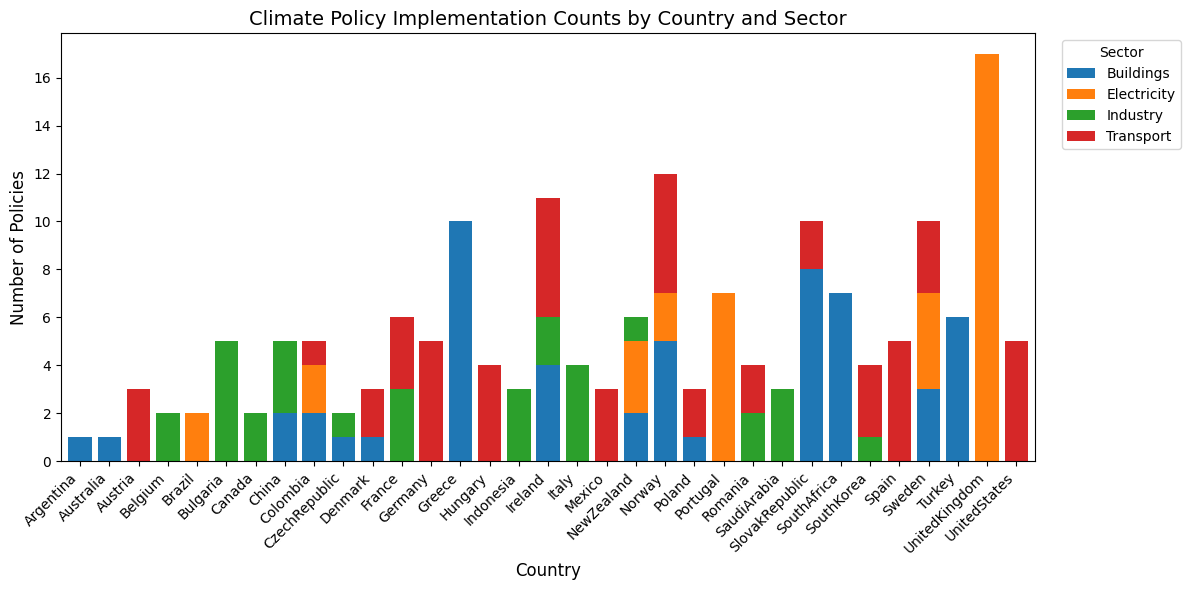

In [3]:
import matplotlib.pyplot as plt

counts = (
    df
    .groupby(['Country', 'Sector'])
    .size()
    .reset_index(name='count')
)


pivot = counts.pivot(index='Country', columns='Sector', values='count').fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8
)

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Policies', fontsize=12)
ax.set_title('Climate Policy Implementation Counts by Country and Sector', fontsize=14)
ax.legend(title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [5]:
counts = (
    df
    .groupby(['Sector','Policy_name','Instrument'])
    .size()
    .reset_index(name='count')
)

# Sunburst try Sector > Policy_name>Instrument
import plotly.express as px
fig = px.sunburst(
    counts,
    path=['Sector','Policy_name','Instrument'],
    values='count',
    title='Hierarchical Breakdown of Climate Policies (by Sector, Policy Name, and Instrument)'
)
fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<extra></extra>')
fig.show()